In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Import necessary libraries
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing
#### 1 - Reading Input data for White Wine

In [8]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print("Our white wine dataset has: {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

Our white wine dataset has: 1599 rows and 12 columns


#### 2 - Identify NULL Values (if any)

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 3 - There are no columns which are unique identifiers. Hence, no column will be removed

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 4 - Measure skeweness in our dataset

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


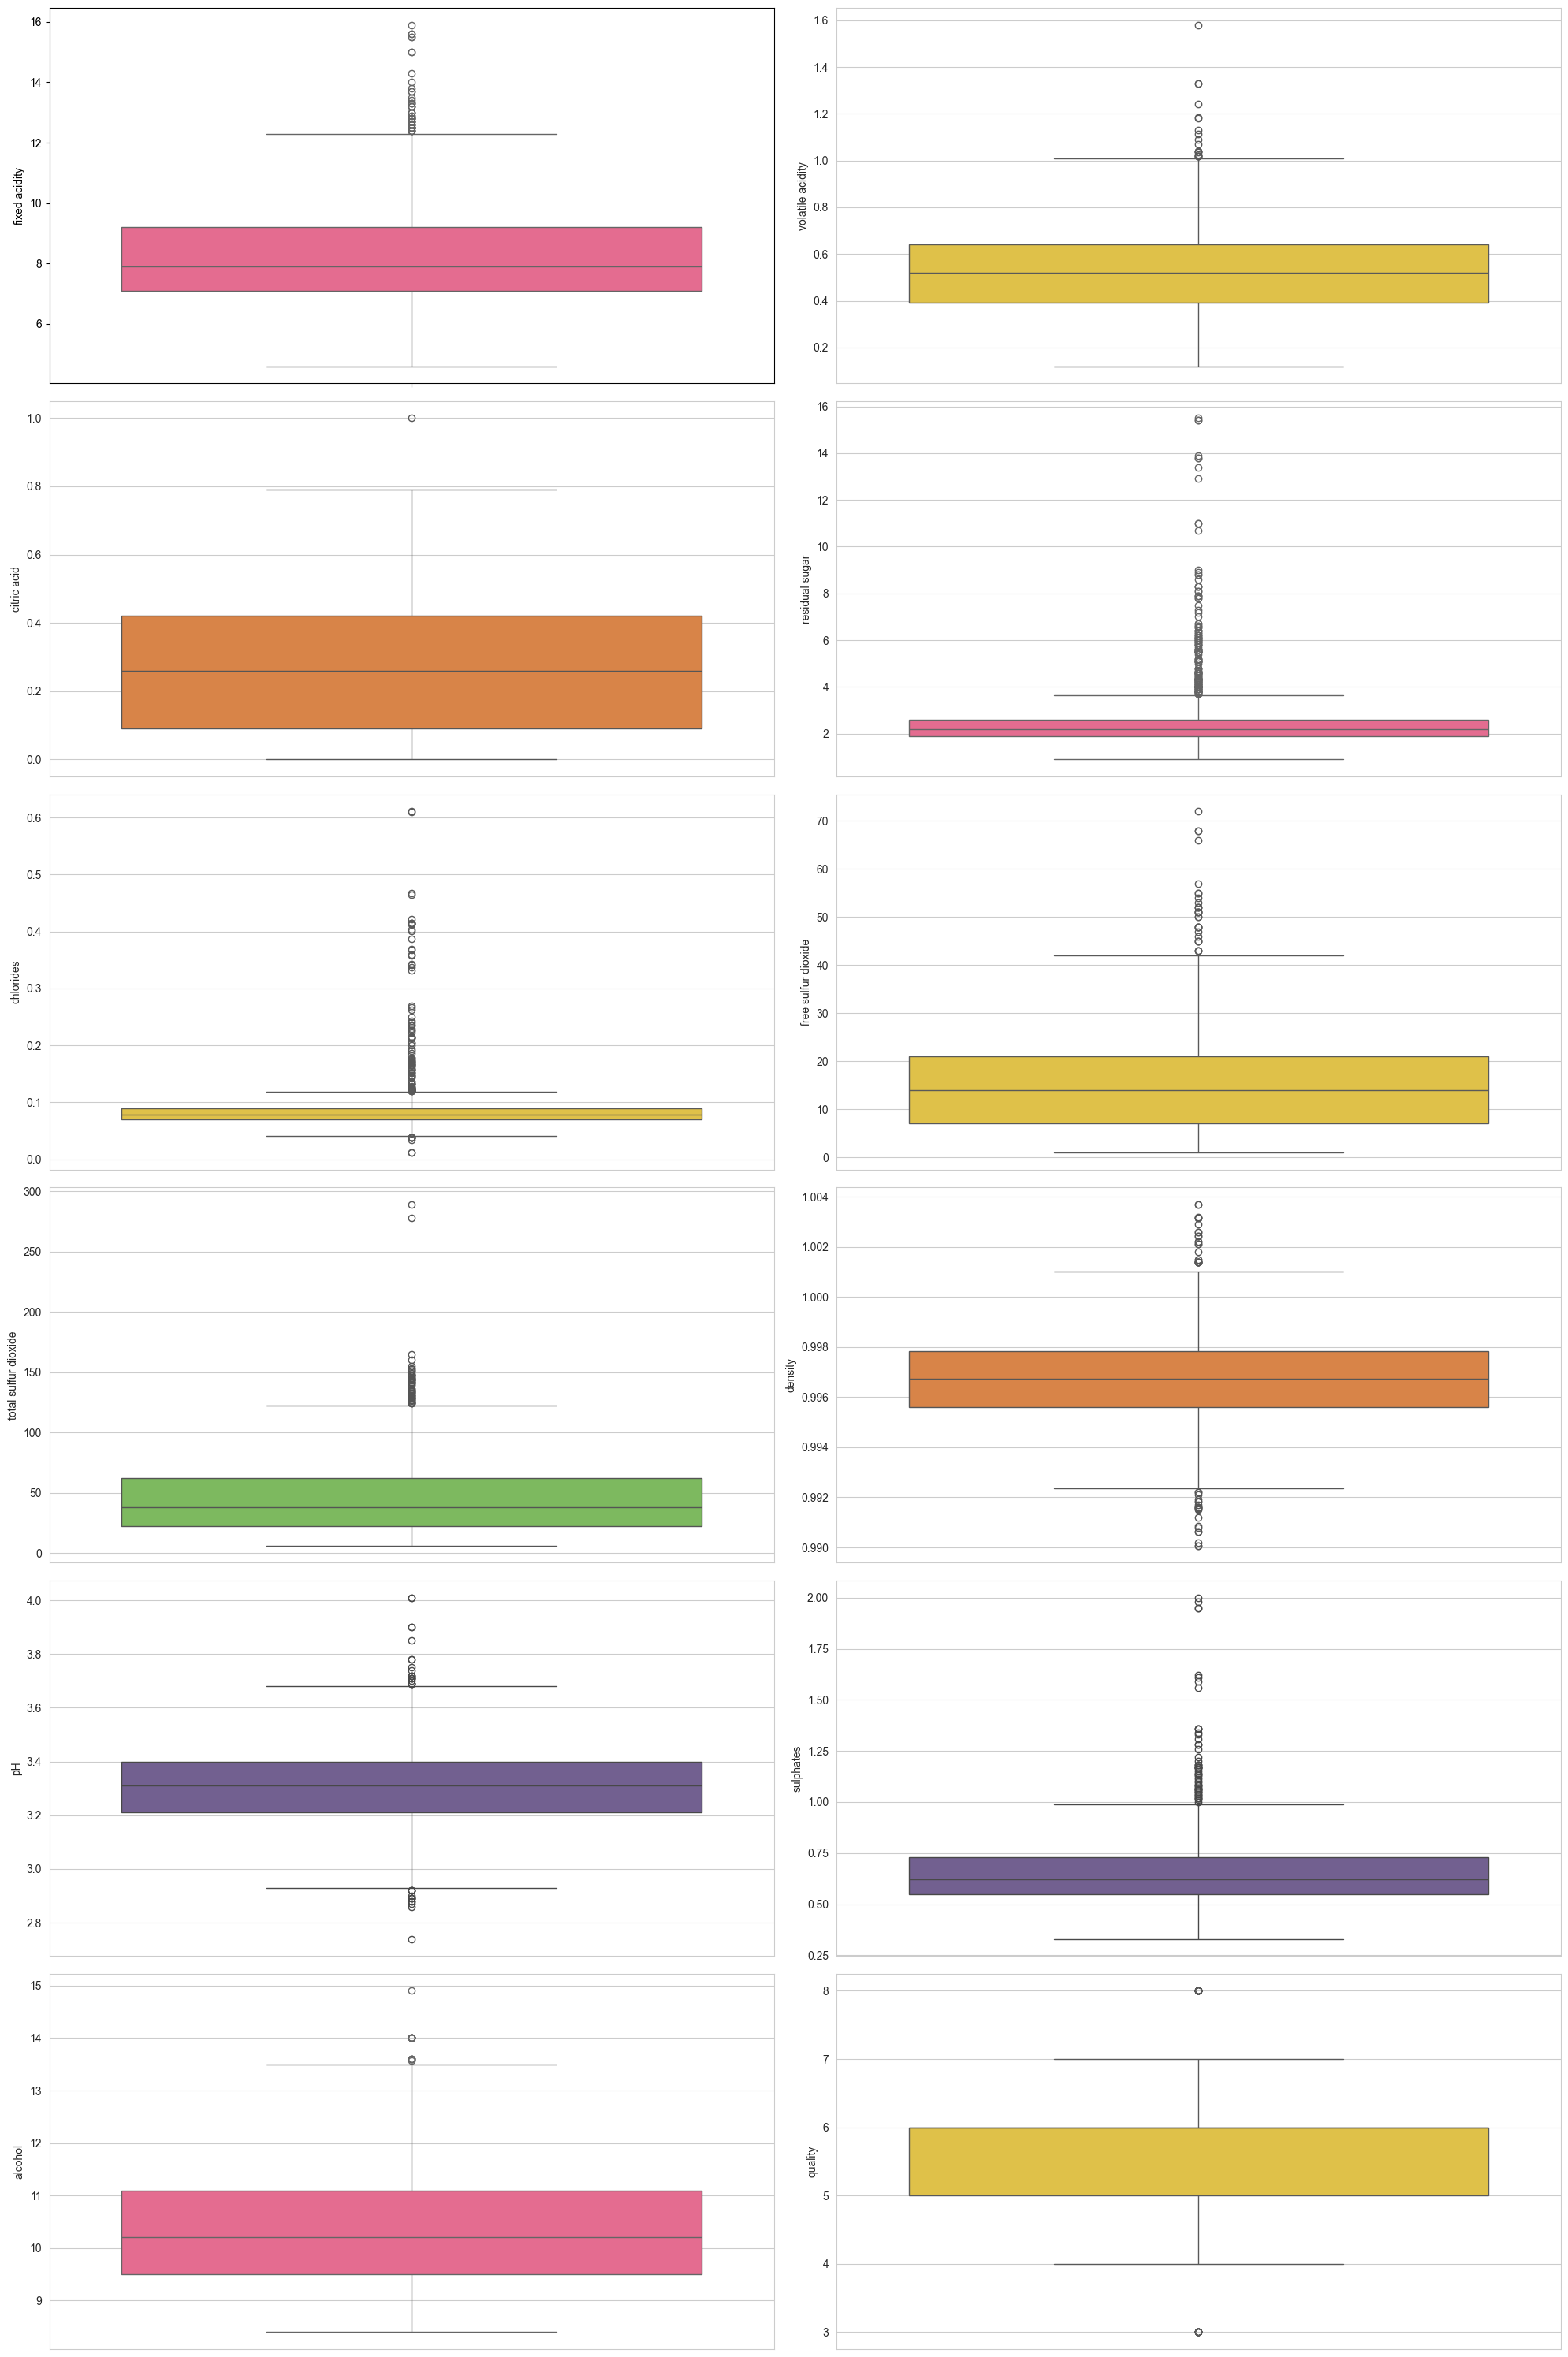

In [15]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']

# Tính độ lệch của các cột
print(df.skew())

# Lấy tên các cột
l = df.columns.values

# Tính số lượng cột và hàng
number_of_columns = math.ceil(df.shape[1] / 6)
number_of_rows = math.ceil(len(l) / number_of_columns)

# Tạo hình vẽ với kích thước phù hợp
plt.figure(figsize=(10 * number_of_columns, 5 * number_of_rows))

# Vẽ biểu đồ boxplot cho từng cột
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sb.set_style('whitegrid')
    sb.boxplot(df[l[i]], color=colors[np.random.randint(6)], orient='v')
    plt.tight_layout()

plt.show()

#### 5 - Understanding correlation between variables
#### <u>Observations</u>:
##### 1) Acidity in wine decreases, as we increase the pH value
##### 2) Wine density/thickness increases rapidly as the content of residual sugar increases
##### 3) Alcohol content is inversely proportional to residual sugar. Hence, if sugar content is increased, alcohol qualtiy automatically decreases
##### 4) Wine quality increases, if Alcohol content increases

Hence, the right amount of acids, residual sugar and alcohol, is what will improve our wine quality

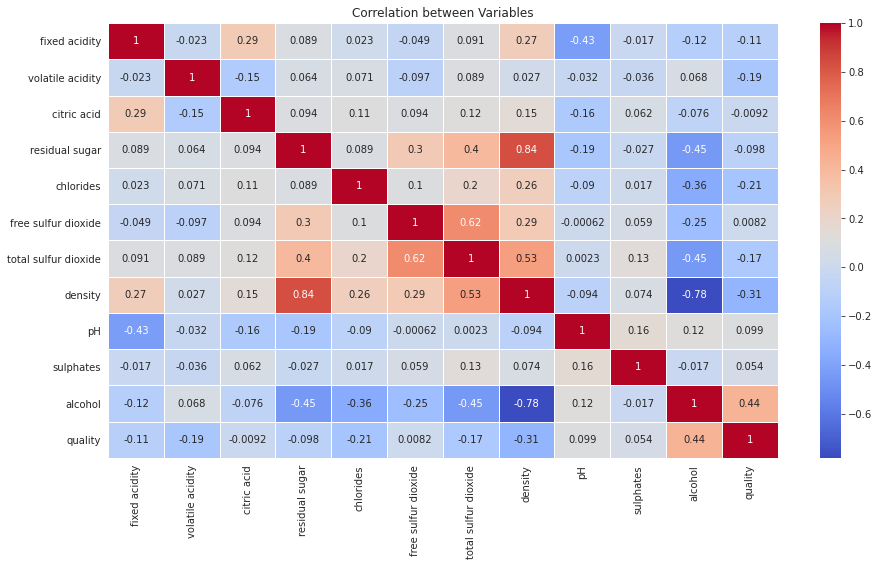

In [8]:
plt.figure(figsize=(15,8))
plt.title("Correlation between Variables")
sb.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

#### Understanding correlation between alcohol and wine quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

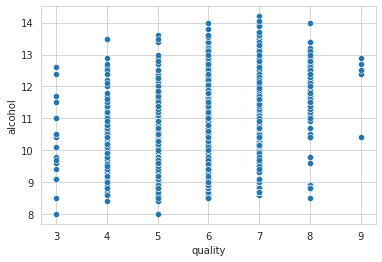

In [9]:
sb.scatterplot(df.quality, df.alcohol)

#### 6 - Model Development

In [10]:
from sklearn.model_selection import train_test_split

####################################
# Step 4: Data Sampling

# Take all columns in X except our target variable
df_x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]

# Take target variable in Y
df_y = df.iloc[:, 11]

####################################
# Step 5: Train-Test split

# Split 20% of data in test data and rest 80% in train. i.e. test_size = .2
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size = .2)

In [11]:
df_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
df_y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

### Linear Regression, since this is a regression problem
#### We will identify MSE value, and use the model, whichever gives MSE value closer to 0. That will help us ensure that prediction error rate of our model is least

In [13]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Create an object using sklearn's LinearRegression() method
model = linear_model.LinearRegression()

# Use Cross-Validation technique for 5-folds to identify best MSE rate
mse = cross_val_score(model, df_x, df_y, scoring="neg_mean_squared_error", cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.5826180652175313


#### This MSE Rate is very near to 0. However, let us identify if we can use LASSO/RIDGE to reduce it furthermore

#### 1 - Ridge

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters={"alpha": [-1, 0, 0.5, 1]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(df_x, df_y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)  # This is MSE for ridge

{'alpha': 0}
-0.5826180652175328


#### 2- Lasso

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters={"alpha": [-1, 0, 0.5, 1]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(df_x, df_y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)  # This is MSE for ridge

{'alpha': 0}
-0.5826180652175337


### MSE rate is least observed using Ridge Regression. So we will use Ridge in our Linear Regression model

In [16]:
ridge_regressor.fit(df_x_train, df_y_train)

# Predict our test data
pred_test = ridge_regressor.predict(df_x_test)

# Predict our train data
pred_train = ridge_regressor.predict(df_x_train)


####################################
# Step 5: Accuracy and Evaluation Metrics

# Evaluation Metrics
Rsquare = ridge_regressor.score(df_x_train, df_y_train)
print("RSquare: " + str(-Rsquare))


K = df_x_train.shape[1]  # Total no. of Columns in Train data
N = df_x_train.shape[0]  # Total no. of Rows/Values/Observations

Adj_Rsquare = 1 - (1 - (-Rsquare)) * (N - 1)/ (N - K - 1)
print("Adjusted RSquare: " + str(Adj_Rsquare))

RSquare: 0.5704746551778055
Adjusted RSquare: 0.5692650343910559


### 7 - Estimate prediction error rate for our choosen Model
#### <i>It must be between -3 to +3</i>

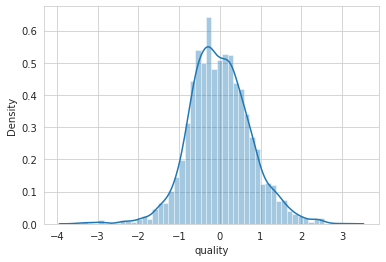

In [17]:
# Prediction error = Actual - Predicted values
# Find error in train data prediction
error_pred = df_y_train - pred_train

# Plot but with a line and see if it falls within range (-3, 3)
sb.distplot(error_pred)
plt.show()

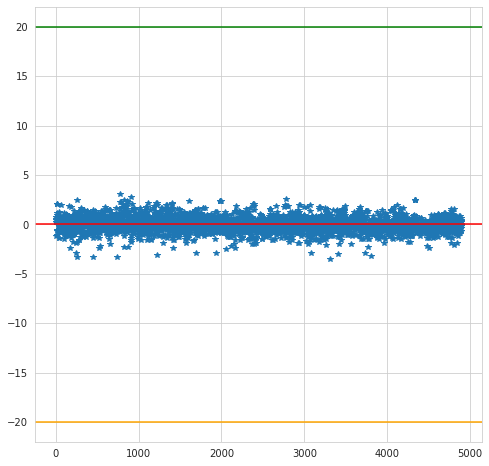

In [18]:
# Plot model prediction accuracy
plt.figure(figsize=(8,8))
plt.plot(error_pred, "*")

plt.axhline(y = np.mean(error_pred), color="r")

# Mark 3 and -3 limits in diff colors
plt.axhline(y = 20, color = "g")
plt.axhline(y = -20, color = "orange")

Plot Actual vs Predicted values to observe the difference

In [19]:
temp = df_x_test

temp["actual"] = df_y_test
temp["prediction"] = pred_test

temp.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,actual,prediction
4515,7.1,0.28,0.26,2.8,0.039,50.0,118.0,0.99080,3.06,0.59,11.2,6,6.263015
1368,7.3,0.22,0.41,15.4,0.050,55.0,191.0,1.00000,3.32,0.59,8.9,6,5.773769
1443,7.0,0.18,0.49,5.3,0.040,34.0,125.0,0.99140,3.24,0.40,12.2,6,6.654233
4603,5.0,0.33,0.18,4.6,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,6.004699
1734,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,6,5.733837
2475,7.4,0.56,0.09,1.5,0.071,19.0,117.0,0.99496,3.22,0.53,9.8,5,4.756320
4293,7.2,0.21,0.36,15.7,0.045,68.0,183.0,0.99922,3.25,0.76,9.4,5,6.144259
1814,8.2,0.42,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7,6.181366
1914,6.8,0.43,0.30,3.5,0.033,27.0,135.0,0.99060,3.00,0.37,12.0,6,5.930163
965,8.3,0.23,0.43,3.2,0.035,14.0,101.0,0.99280,3.15,0.36,11.5,5,5.993835
